# Principal Component Analysis - PCA

Notebook de experimentação e estudo sobre PCA

## 0.0. Imports

In [2]:
import pandas as pd
import numpy as np

from sklearn import model_selection as ms
from sklearn import preprocessing as pp
from sklearn import decomposition as d
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt

## 0.1. Carregando dados

In [3]:
df_raw = pd.read_csv('../../dados/vehicle.csv')

# Seleciona apenas Carros e ônibus
df1 = df_raw[df_raw['class'].isin(['car', 'bus'])]

In [4]:
# Valida Nulos
df1.isna().sum()

df1 = df1.dropna()

In [5]:
x = df1.drop('class', axis=1)
y = df1['class']

x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.1, random_state=42)

# 1.0. Redes Neurais sem PCA

In [6]:
# HOLD OUT
train_acc_list = []
val_acc_list = []

for i in range(0, 5):
    # split training and validation
    x_train, x_val, y_train, y_val = ms.train_test_split(x, y, test_size=0.2)

    # y for NN
    ohe = pp.OneHotEncoder()
    y_train = ohe.fit_transform(y_train.values.reshape(-1, 1)).toarray()
    y_val = ohe.transform(y_val.values.reshape(-1, 1)).toarray()


    # MLP: Neural Network 
    ## model definition
    model = Sequential()
    model.add(Dense(2, input_dim=x_train.shape[1], activation='relu')) # 2 neurons on Hidden Layer + Input Layer
    model.add(Dense(2, activation='softmax'))

    ## model compile
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    ### model fit (training)
    es = EarlyStopping(monitor='val_loss', patience=10)
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, callbacks=[es], verbose=0)

    ## model evaluate
    _, train_acc = model.evaluate(x_train, y_train, verbose=0)
    _, val_acc = model.evaluate(x_val, y_val, verbose=0)

    #print('Train ACC:{} - Val ACC:{}'.format(train_acc, val_acc))
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

In [7]:
print('Train ACC AVG: {} +/- {}'.format(np.mean(train_acc_list), np.std(train_acc_list)))
print('Val ACC AVG: {} +/- {}'.format(np.mean(val_acc_list), np.std(val_acc_list))) 

Train ACC AVG: 0.6712550640106201 +/- 0.010908666576009097
Val ACC AVG: 0.674193549156189 +/- 0.02727666583779315


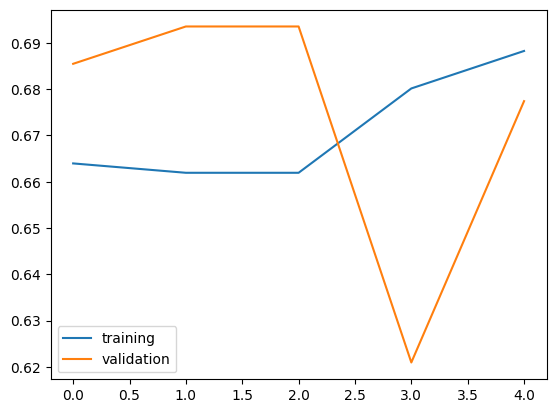

In [8]:
plt.plot(train_acc_list, label='training')
plt.plot(val_acc_list, label='validation')
plt.legend()

Validando acurrácia com dados de teste.

In [9]:
y_test_nn = ohe.transform(y_test.values.reshape(-1, 1) ).toarray()
_, test_acc = model.evaluate(x_test, y_test_nn, verbose=0)

print('Test ACC:{}'.format(test_acc))

Test ACC:0.6935483813285828
